<div align = 'left'><font color = 'black'><b><h1> Car Sales Visualizations</h></b></font></div>

Authored and Presented by: Sarah Casella Jones, Ph.D., BCBA-D, LBA; email: sarah.c.jones@niu.odni.gov

All "Car Sales" data were downloaded from www.kaggle.com, ... "the place to do data science projects."

The following rubric us used to assess the data columns:

<img src="./pictures/car_sales_1.png" width=75%>
<img src="./pictures/car_sales_2.png" width=75%>


## Questions to answer:

* What was the total number of car orders placed over time?
* What was the price increase of cars over time?
* What sales trends were observed?
* What was the customer retention rate over time?
* Any concerns with the car sales?



## Table of Contents
<span id = 'TableOfContents'></span>
* <a href = '# Import Packages & Create a Directory'> 1. Import Packages & Create Directory</a>
* <a href = '# Upload Data'> 2. Upload Data</a>
* <a href = '# EDA'> 3. Exploratory Data Analysis</a>
* <a href = '# univariate'> 4. Univariate Analysis</a>
* <a href = '# bivariate'> 5. Bivariate Analysis</a>
* <a href = '# timelines'> 6. Yearly, Quarterly, Monthly, Weekly</a>
* <a href = '# multivariate'> 7. Multivariate</a>
* <a href = '# Key Insights'> 8. Key Insights from Analysis</a>

### 1. Import Packages & Create Directory

In [31]:
#Import Packages first
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import csv
import os
import glob

import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px

from warnings import filterwarnings
filterwarnings('ignore')
print('Import Complete')

#Declare a timeframe for graphics
time = dt.datetime.now().strftime(format = '%Y-%m-%d')

#Create Directory:
mydir = 'Car Sales'
if not os.path.isdir(mydir):
    os.mkdir(mydir)
print('Directory Creation Complete')

Import Complete
Directory Creation Complete


### 2. Upload Data

In [32]:
#Upload the individual documents into one data frame
file_directory = 'Car Sales Data/'
all_files = glob.glob(file_directory + "/*.csv")


file_list = []

for filename in all_files:
    df1 = pd.read_csv(filename, parse_dates = ['ORDERDATE'], dayfirst=True, index_col=None, header=0)
    file_list.append(df1)
display('Number of files: ', len(file_list))
df = pd.concat(file_list, axis=0, ignore_index=True)
display('Total number of rows: ', df.shape[0])
display(df[-3:])
print('Complete Data Upload')

'Number of files: '

1

'Total number of rows: '

2747

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2744,10386,43,125.99,4,5417.57,2020-03-01,2836,Resolved,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Medium
2745,10397,34,62.24,1,2116.16,2020-03-28,2810,Shipped,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,Toulouse,31000,France,Roulet,Annette,Small
2746,10414,47,65.52,9,3079.44,2020-05-06,2772,On Hold,Ships,54,S72_3212,Gifts4AllAges.com,6175559555,8616 Spinnaker Dr.,Boston,51003,USA,Yoshido,Juri,Medium


Complete Data Upload


In [33]:
#Copy the dataframe into a new one so the original data is preserved.
cars_df = df.copy()

In [34]:
print('*'*30)
print('The number of rows:\n ',cars_df.shape[0])
print('*'*30)
print('The number of columns: \n', cars_df.shape[1])
print('*'*30)
print('The types of data in the data frame:\n ', cars_df.dtypes)
print('*'*30)
print('The description of the data: \n', cars_df.describe())
print('*'*30)
print('The description of the data: \n ', cars_df.columns)
print('*'*30)
print('The first three rows look like this:\n ', cars_df.head(3))
print('*'*30)

******************************
The number of rows:
  2747
******************************
The number of columns: 
 20
******************************
The types of data in the data frame:
  ORDERNUMBER                      int64
QUANTITYORDERED                  int64
PRICEEACH                      float64
ORDERLINENUMBER                  int64
SALES                          float64
ORDERDATE               datetime64[ns]
DAYS_SINCE_LASTORDER             int64
STATUS                          object
PRODUCTLINE                     object
MSRP                             int64
PRODUCTCODE                     object
CUSTOMERNAME                    object
PHONE                           object
ADDRESSLINE1                    object
CITY                            object
POSTALCODE                      object
COUNTRY                         object
CONTACTLASTNAME                 object
CONTACTFIRSTNAME                object
DEALSIZE                        object
dtype: object
*******************

In [35]:
#Let's drop days since last order & create a new feature having time difference as : DateLast order - 06-01-2020

# Check if 'DAYS_SINCE_LASTORDER' column exists before dropping it
if 'DAYS_SINCE_LASTORDER' in cars_df.columns:
    cars_df = cars_df.drop('DAYS_SINCE_LASTORDER', axis=1)

## Create a new feature 'DAYS_SINCE_LASTORDER' based on the time difference
temp_date = pd.to_datetime('2020-06-01')  # Define the specific date
cars_df['DAYS_SINCE_LASTORDER'] = (temp_date - cars_df['ORDERDATE']).dt.days
print('The first three rows look like this:\n ', cars_df.head(3))

The first three rows look like this:
     ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   

   ORDERDATE   STATUS  PRODUCTLINE  MSRP PRODUCTCODE        CUSTOMERNAME  \
0 2018-02-24  Shipped  Motorcycles    95    S10_1678   Land of Toys Inc.   
1 2018-05-07  Shipped  Motorcycles    95    S10_1678  Reims Collectables   
2 2018-07-01  Shipped  Motorcycles    95    S10_1678     Lyon Souveniers   

              PHONE                   ADDRESSLINE1   CITY POSTALCODE COUNTRY  \
0        2125557818        897 Long Airport Avenue    NYC      10022     USA   
1        26.47.1555             59 rue de l'Abbaye  Reims      51100  France   
2  +33 1 46 62 7555  27 rue du Colonel Pierre Avia  Paris      75508  France   

  CONTACTLASTNAME CONTACTFIRSTNAME DEALSIZE  D

**Numerical features**

* Since ORDERNUMBER is not relevant for the EDA here, we will drop for Exploratory data analysis & visualizations

In [36]:
cars_df_num = cars_df.select_dtypes(include=['float64', 'int64']).drop(columns=['ORDERNUMBER'])
print(cars_df_num.columns, len(list(cars_df_num.columns.values)))

Index(['QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'MSRP',
       'DAYS_SINCE_LASTORDER'],
      dtype='object') 6


**Categorical Features** 

* We do not need below columns for analysis hence we will exlude from plots: 'PHONE','ADDRESSLINE1', 'CONTACTLASTNAME','CONTACTFIRSTNAME'

In [37]:
cars_df_cat = cars_df.select_dtypes(include = ['object']).drop(columns=['PHONE','ADDRESSLINE1', 'CONTACTLASTNAME','CONTACTFIRSTNAME'])
print(cars_df_cat.columns, len(list(cars_df_cat.columns.values)))

Index(['STATUS', 'PRODUCTLINE', 'PRODUCTCODE', 'CUSTOMERNAME', 'CITY',
       'POSTALCODE', 'COUNTRY', 'DEALSIZE'],
      dtype='object') 8


### **Display Summary**

In [38]:
#Descriptive Summary of the dataset - Numeric features

display(round(cars_df_num.describe(),2).T)

,count,mean,std,min,25%,50%,75%,max
QUANTITYORDERED,2747.0,35.10,9.76,6.00,27.00,35.00,43.00,97.00
PRICEEACH,2747.0,101.10,42.04,26.88,68.74,95.55,127.10,252.87
ORDERLINENUMBER,2747.0,6.49,4.23,1.00,3.00,6.00,9.00,18.00
SALES,2747.0,3553.05,1838.95,482.13,2204.35,3184.80,4503.09,14082.80
MSRP,2747.0,100.69,40.11,33.00,68.00,99.00,124.00,214.00
DAYS_SINCE_LASTORDER,2747.0,384.09,230.23,1.00,197.00,343.00,571.00,877.00


In [39]:
#Descriptive Summary of the dataset - Categorical features

cars_df_cat.select_dtypes(include = ['object'])[:-5].describe().T

,count,unique,top,freq
STATUS,2742,6,Shipped,2538
PRODUCTLINE,2742,7,Classic Cars,949
PRODUCTCODE,2742,109,S18_3232,51
CUSTOMERNAME,2742,89,Euro Shopping Channel,257
CITY,2742,71,Madrid,302
POSTALCODE,2742,73,28034,257
COUNTRY,2742,19,USA,927
DEALSIZE,2742,3,Medium,1346


What insights can you infer from these few dataframes?

### **Missing Values**

In [40]:
#Missing values
cars_df.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
DAYS_SINCE_LASTORDER    0
dtype: int64

* No missing values found

### **Duplicate Values**

In [41]:
#Checking duplicate values
cars_df.duplicated().sum()

0

* No Duplicate values found

### **Univariate Analysis**

In [42]:
cat_columns = cars_df[['STATUS', 'PRODUCTLINE', 'DEALSIZE']]
def univariateAnalysis_category(cols):
    print("Distribution of", cols)
    print("_"* 60)
    colors = ['#79a5db', '#e0a580', '#6fab90', '#896ca8', '#ADD8E6']
    value_counts = cat_columns[cols].value_counts()
    # Count plot
    fig = px.bar(value_counts,x=value_counts.index, y=value_counts.values, title=f'Distribution of {cols}',
        labels={'x': 'Categories', 'y': 'Count'},color_discrete_sequence=[colors])
    fig.update_layout(width=700)
    fig.update_layout(plot_bgcolor='#ffffff', paper_bgcolor='#ffffff')
    fig.show()
    # Donut chart
    percentage = (value_counts / value_counts.sum()) * 100
    fig = px.pie( values=percentage, names=value_counts.index,
        labels={'names': 'Categories', 'values': 'Percentage'}, hole=0.5,color_discrete_sequence=colors)
    fig.add_annotation( x=0.5, y=0.5, align="center", xref="paper",
        yref="paper", showarrow=False, font_size=15, text=f'{cols}')
    fig.update_layout(legend=dict(x=0.9, y=0.5))
    fig.update_layout(width=700)
    fig.show()
    print("       ")
for x in cat_columns:
    univariateAnalysis_category(x)

Distribution of STATUS
____________________________________________________________


       
Distribution of PRODUCTLINE
____________________________________________________________


       
Distribution of DEALSIZE
____________________________________________________________


Description of QUANTITYORDERED
******************************
count    2747.000000
mean       35.103021
std         9.762135
min         6.000000
25%        27.000000
50%        35.000000
75%        43.000000
max        97.000000
Name: QUANTITYORDERED, dtype: float64 ******************************
******************************


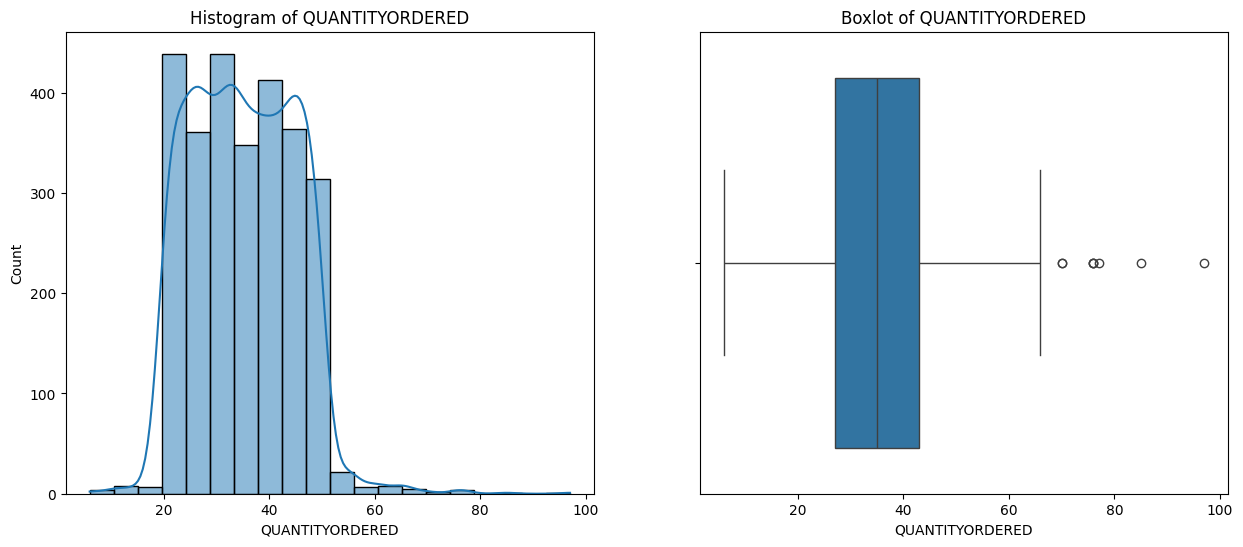

Description of PRICEEACH
******************************
count    2747.000000
mean      101.098952
std        42.042549
min        26.880000
25%        68.745000
50%        95.550000
75%       127.100000
max       252.870000
Name: PRICEEACH, dtype: float64 ******************************
******************************


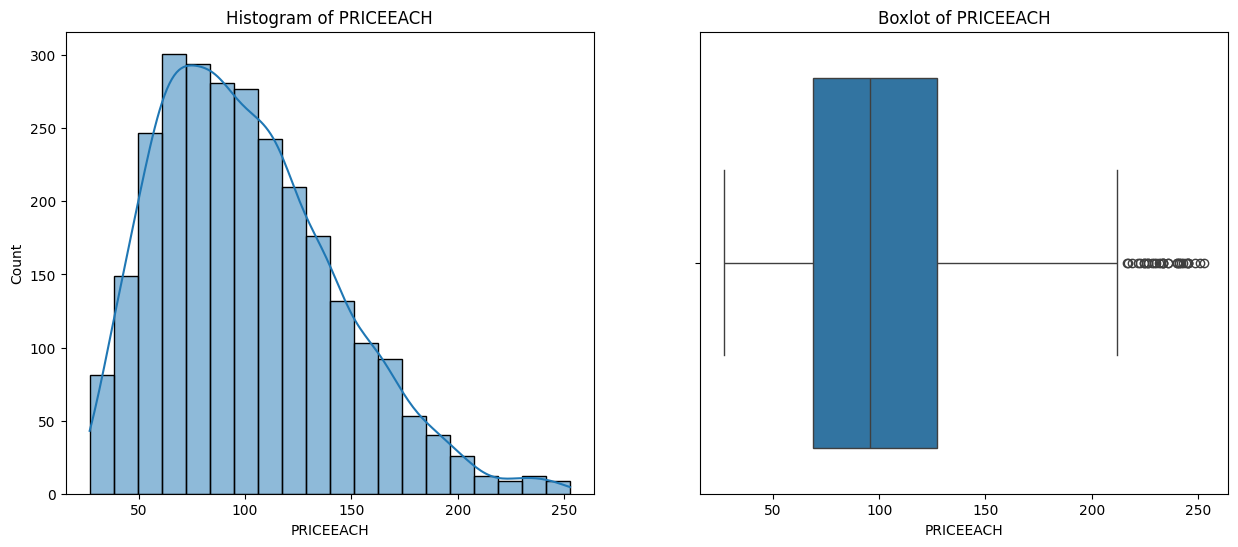

Description of ORDERLINENUMBER
******************************
count    2747.000000
mean        6.491081
std         4.230544
min         1.000000
25%         3.000000
50%         6.000000
75%         9.000000
max        18.000000
Name: ORDERLINENUMBER, dtype: float64 ******************************
******************************


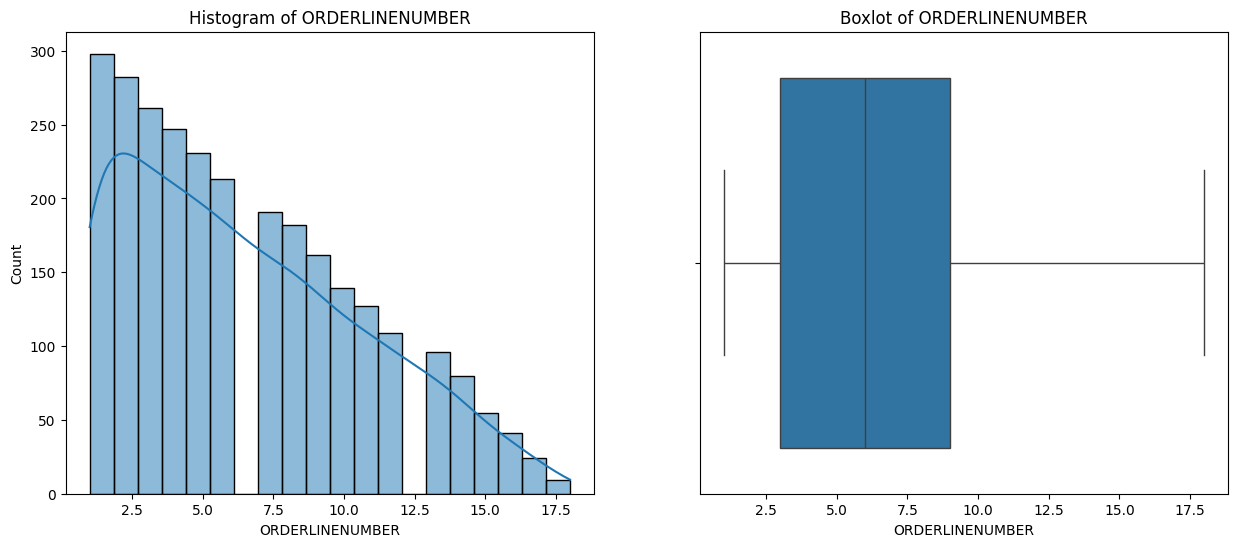

Description of SALES
******************************
count     2747.000000
mean      3553.047583
std       1838.953901
min        482.130000
25%       2204.350000
50%       3184.800000
75%       4503.095000
max      14082.800000
Name: SALES, dtype: float64 ******************************
******************************


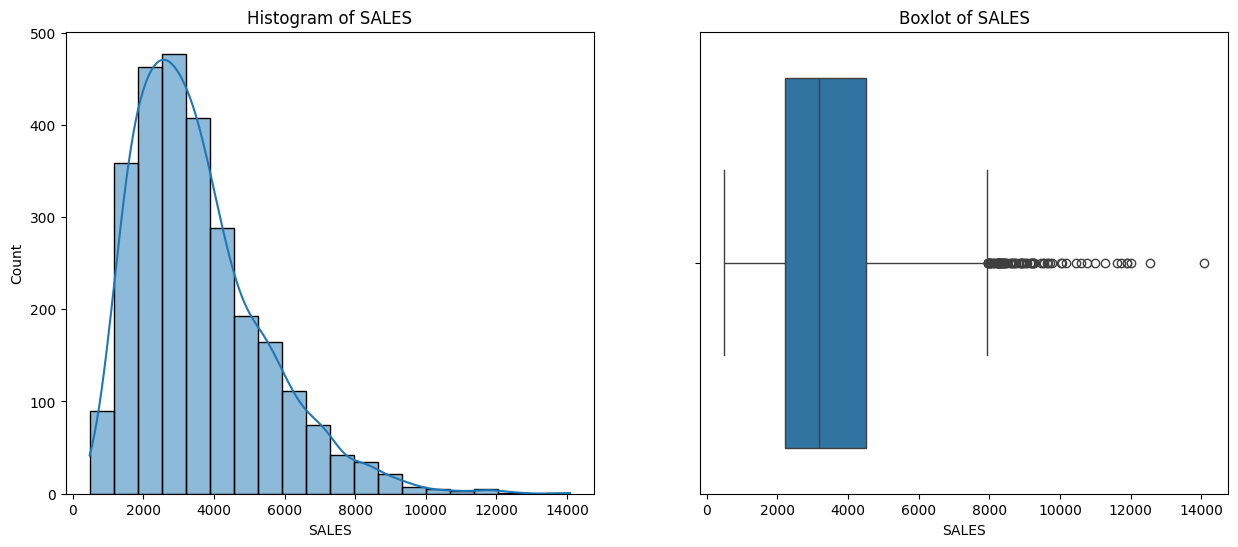

Description of MSRP
******************************
count    2747.000000
mean      100.691664
std        40.114802
min        33.000000
25%        68.000000
50%        99.000000
75%       124.000000
max       214.000000
Name: MSRP, dtype: float64 ******************************
******************************


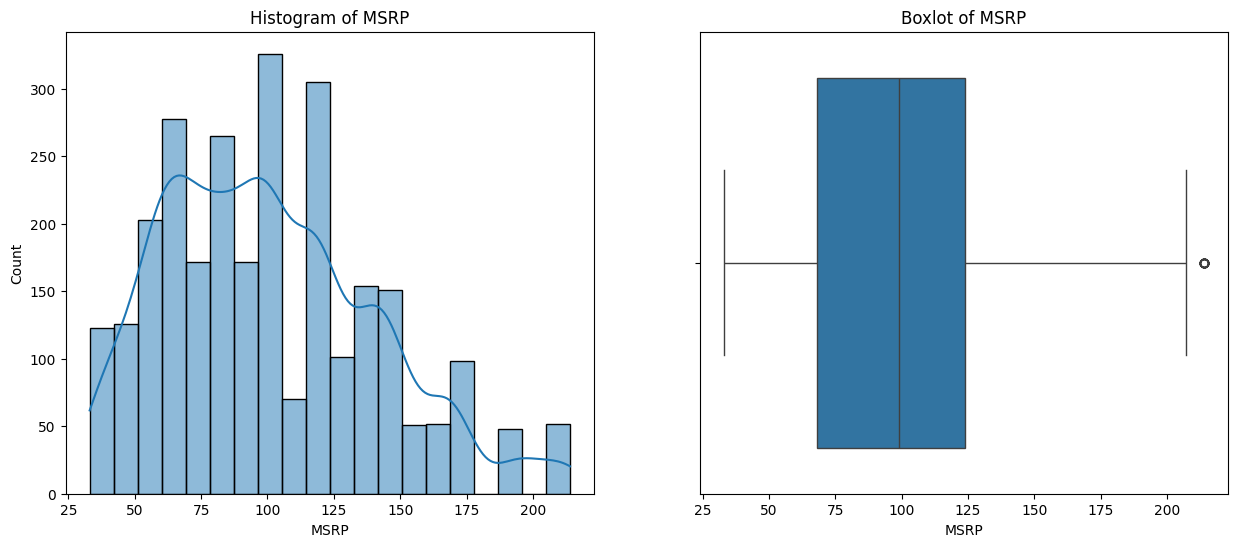

Description of DAYS_SINCE_LASTORDER
******************************
count    2747.000000
mean     1757.085912
std       819.280576
min        42.000000
25%      1077.000000
50%      1761.000000
75%      2436.500000
max      3562.000000
Name: DAYS_SINCE_LASTORDER, dtype: float64 ******************************
******************************


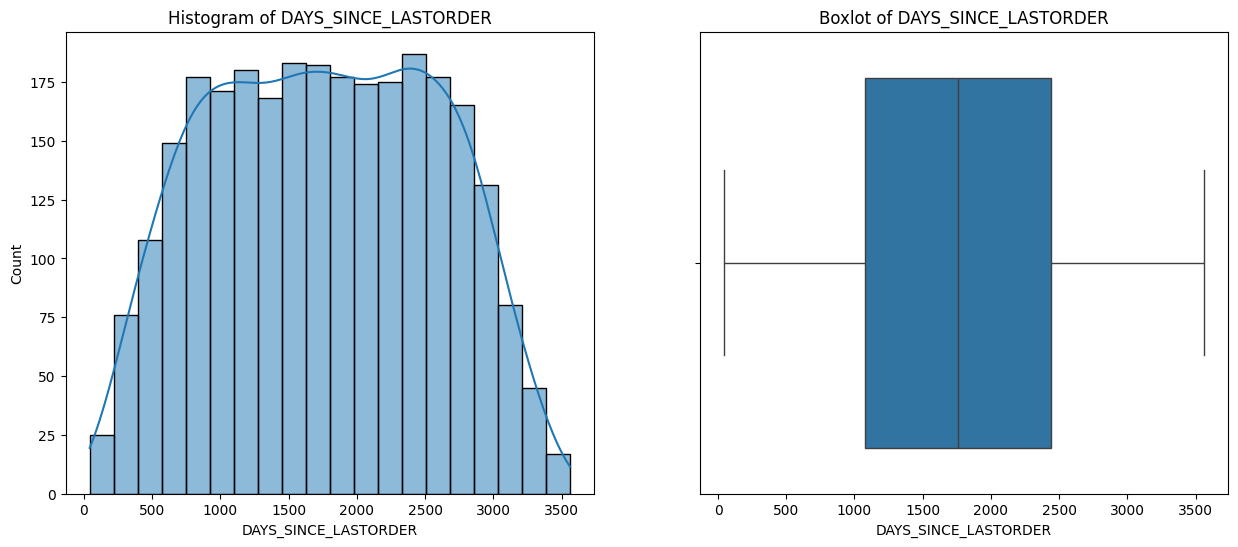

In [43]:
#This cells displays several visualzations. which ones are shown and what do they say about the questions above?
def univariateAnalysis_numeric(column, nbins):
    print("Description of " + column)
    print("*" *30)
    print(df[column].describe(), end=' ')
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    # Plot histogram
    print("*" *30)
    sns.histplot(df[column], bins=nbins, kde=True, ax=axes[0])
    axes[0].set_title("Histogram of " + column)
    # Plot box plot
    print("*" *30)
    sns.boxplot(x=df[column], ax=axes[1])
    axes[1].set_title("Boxlot of " + column )
    plt.show()
for x in cars_df_num:
    univariateAnalysis_numeric(x,20)

In [44]:
#Top 10 Counteries
country_counts = cars_df['COUNTRY'].value_counts()[:10]
fig = go.Figure(go.Funnel(y=country_counts.index,
    x=country_counts.values, textinfo='value', marker={'color': px.colors.sequential.Blues_r}))
fig.update_layout(title_text='Top 10 Country Distribution',  template='plotly_white')
fig.show()

In [45]:
#Top 10 Cities
city_counts = cars_df['CITY'].value_counts()[:10]
fig = go.Figure(go.Funnel(    y=city_counts.index,
    x=city_counts.values,      textinfo='value',
    marker={'color': px.colors.sequential.Blues_r} ))
fig.update_layout(title_text='Top 10 City Distribution', template='plotly_white')
fig.show()

In [46]:
#Top 10 Customer
top10customer = cars_df.sort_values(by="SALES", ascending = False).head(5)
top10customer = cars_df['CUSTOMERNAME'].value_counts()[:10]
fig = go.Figure(go.Funnel(  y=top10customer.index, x=top10customer.values,
    textinfo='value', marker={'color': px.colors.sequential.Blues_r}))
fig.update_layout(title_text='Top 10 Customer Distribution', template='plotly_white')
fig.show()

### **Bivariate Analysis**

Lets investigate these data with Seaborn. What Seaborn functions will use scatter plots and histograms?

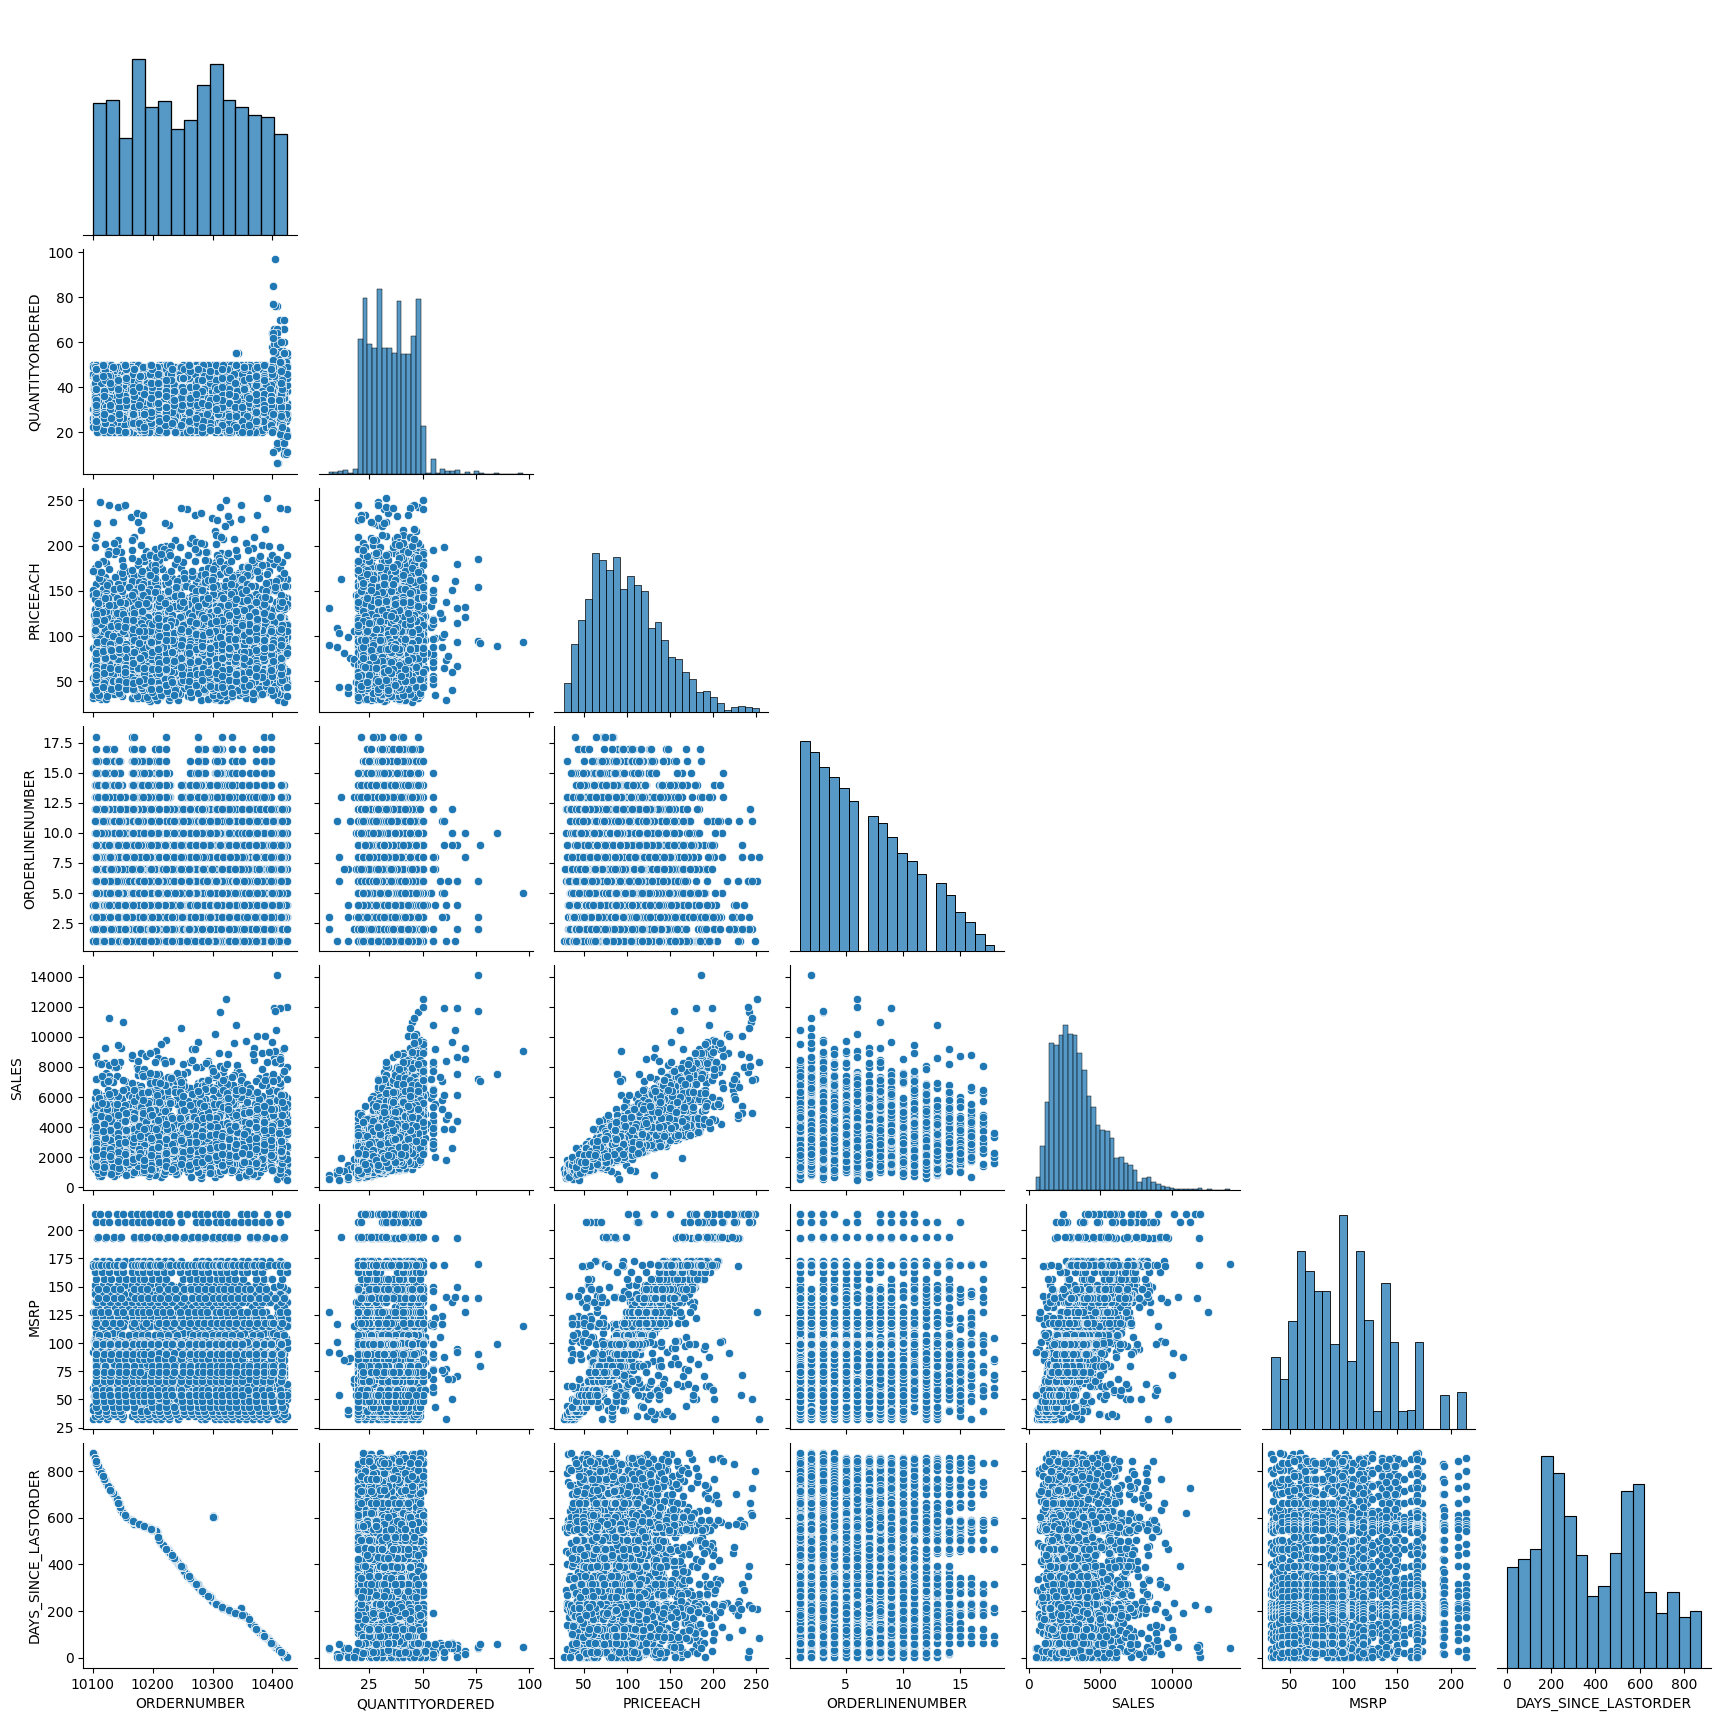

In [47]:
sns.pairplot(data=cars_df, corner = True )

Which graphic can be created to see if there are feature correlations are seen in `QUANTITYORDERED`?

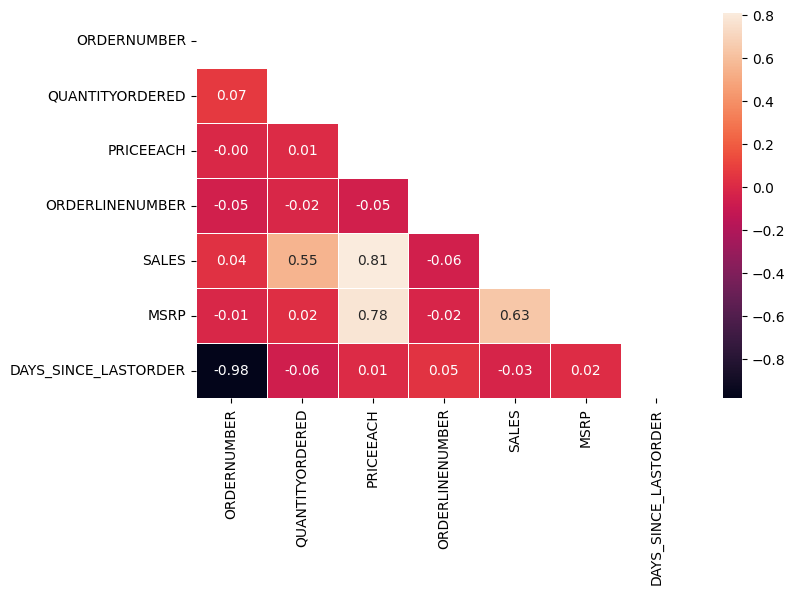

In [48]:
numeric_columns = cars_df.select_dtypes(include=['float64', 'int64']).columns
corr = cars_df[numeric_columns].corr(method='pearson')
mask = np.triu(np.ones_like(corr))
fig = plt.subplots(figsize=(8, 5))
sns.heatmap(corr, annot=True, fmt='.2f', mask=mask, cbar=True, linewidth=0.5)
plt.show()

What are the correlations, if any?

What other graphic could be used to display Sales Distribution in Deal Size? 

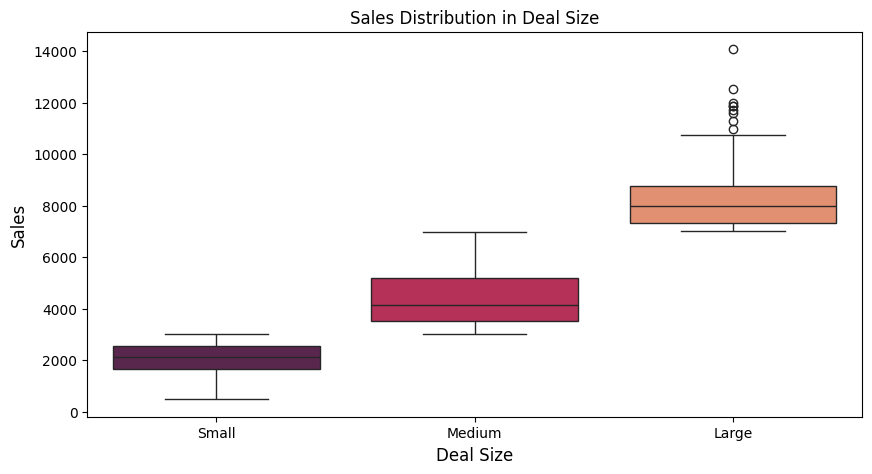

In [49]:
#Sales Distribution in Deal Size 
plt.figure(1 , figsize = (10,5))
sns.boxplot(x = 'DEALSIZE' , y = 'SALES' , data = cars_df, palette='rocket')
plt.title('Sales Distribution in Deal Size')
plt.xlabel("Deal Size", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.xticks(rotation = 0)
plt.show()


What other graphic could be used to display Product Line in Sales Distribition? 

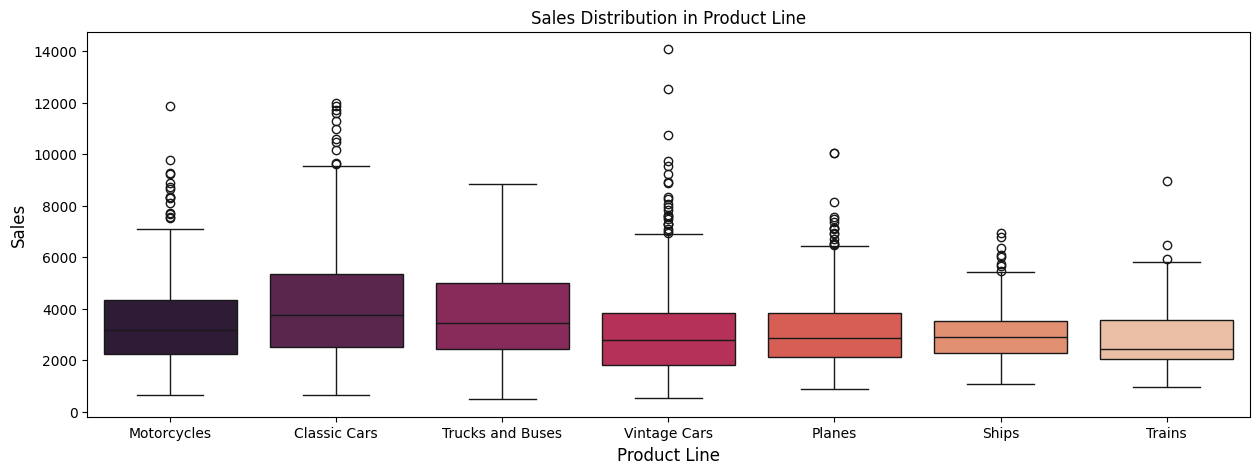

In [50]:
#Sales Distribution in Product Line
plt.figure(1 , figsize = (15,5))
sns.boxplot(x = 'PRODUCTLINE' , y = 'SALES' , data = cars_df, palette='rocket')
plt.title('Sales Distribution in Product Line',fontsize=12)
plt.xlabel("Product Line", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.show()

### Yearly, Quarterly, Monthly, weekly Sales Trend¶

In [51]:
# Extract year, month, week, and quarter from ORDERDATE
cars_df['Year'] = cars_df['ORDERDATE'].dt.year
cars_df['Month'] = cars_df['ORDERDATE'].dt.month
cars_df['Week'] = cars_df['ORDERDATE'].dt.isocalendar().week
cars_df['Quarter'] = cars_df['ORDERDATE'].dt.quarter
# cars_df['Year'][:3]

### What plots would be used to show trends overtime? 

Using the `ORDEREDATE`, 'Quarter', `Month`, and `Week` columns, create a trend line. What are the graphs displaying?

In [52]:
def create_trend_plots(df, x_data, x_label, y_data, y_label, chart_title):
    sns.set(style="whitegrid", rc={"figure.figsize": (20, 5)})
    sns.lineplot(data=cars_df, x=x_data, y=y_data, ci=None, hue="Year",palette=sns.color_palette("Set1", len(cars_df['Year'].unique())))
    plt.title("Sales Trend by " + chart_title)
    plt.xlabel(x_label, fontsize=10)
    plt.ylabel(y_label, fontsize=10)
    plt.legend(title="Year", loc='best')
    plt.show()


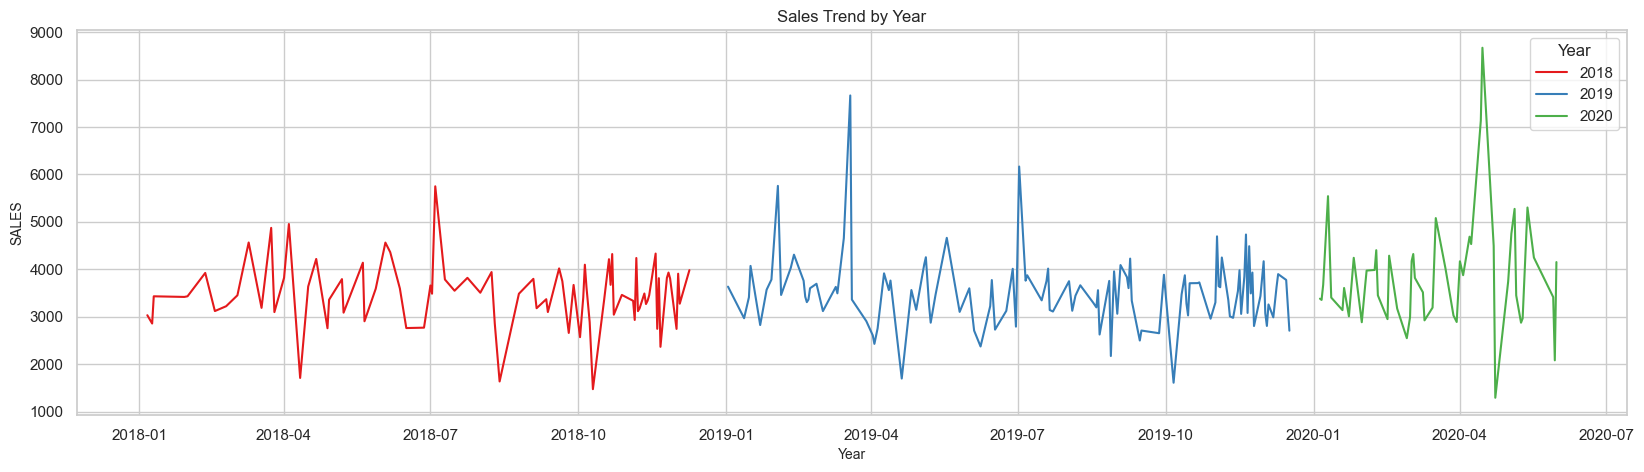

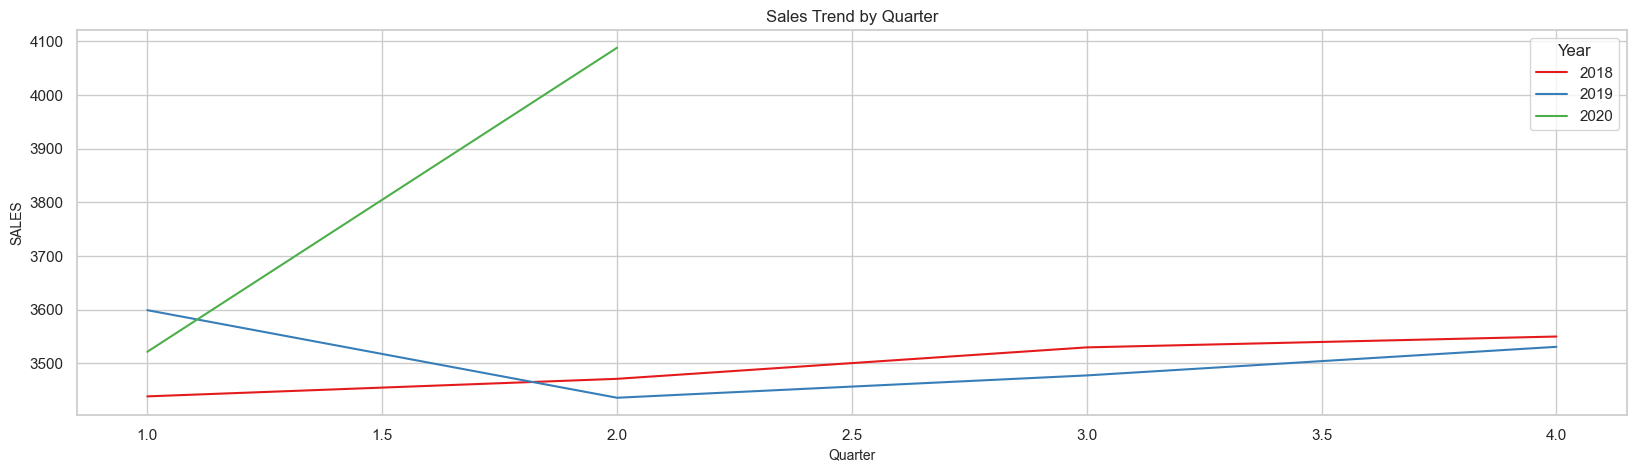

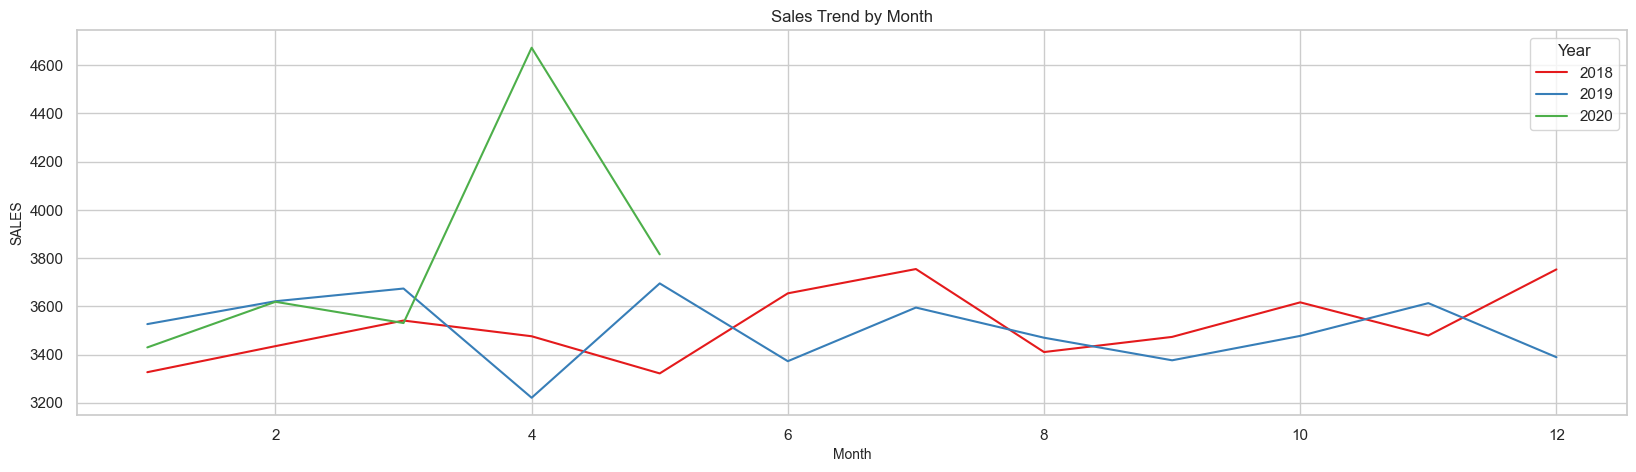

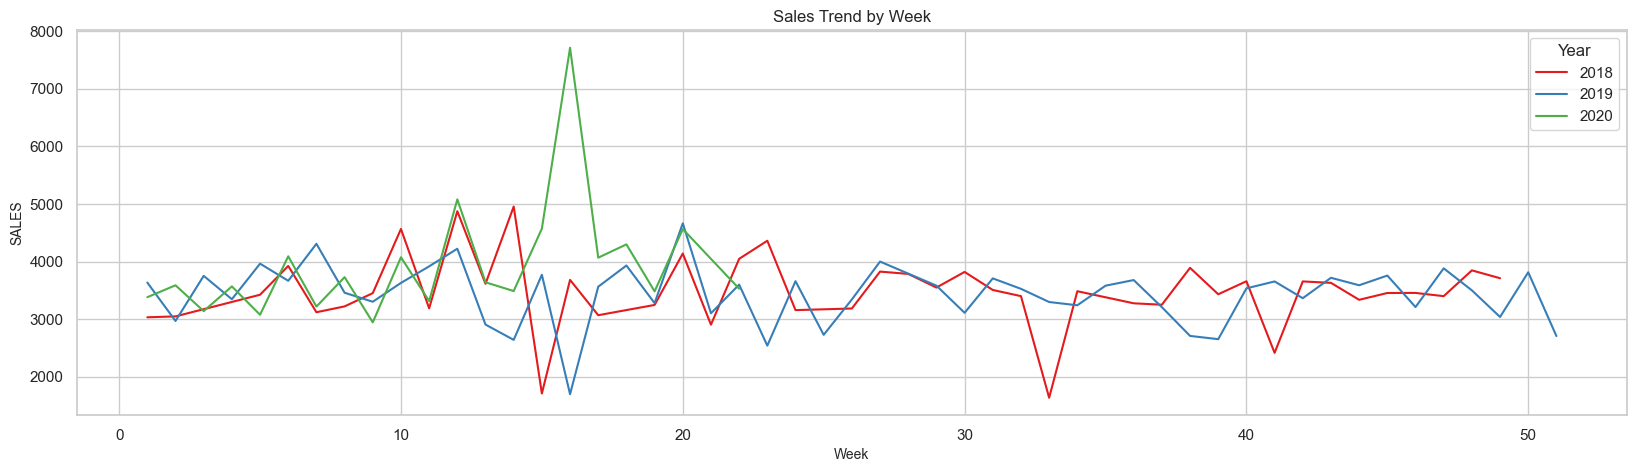

In [53]:
#Execute the above create_trend_plots() from above.
create_trend_plots(cars_df,"ORDERDATE","Year", "SALES", "SALES", "Year" )
print('')
create_trend_plots(cars_df,"Quarter","Quarter", "SALES", "SALES", "Quarter" )
print('')
create_trend_plots(cars_df,"Month","Month", "SALES", "SALES", "Month" )
print('')
create_trend_plots(cars_df,"Week","Week", "SALES", "SALES", "Week" )


### Multivariate Analysis

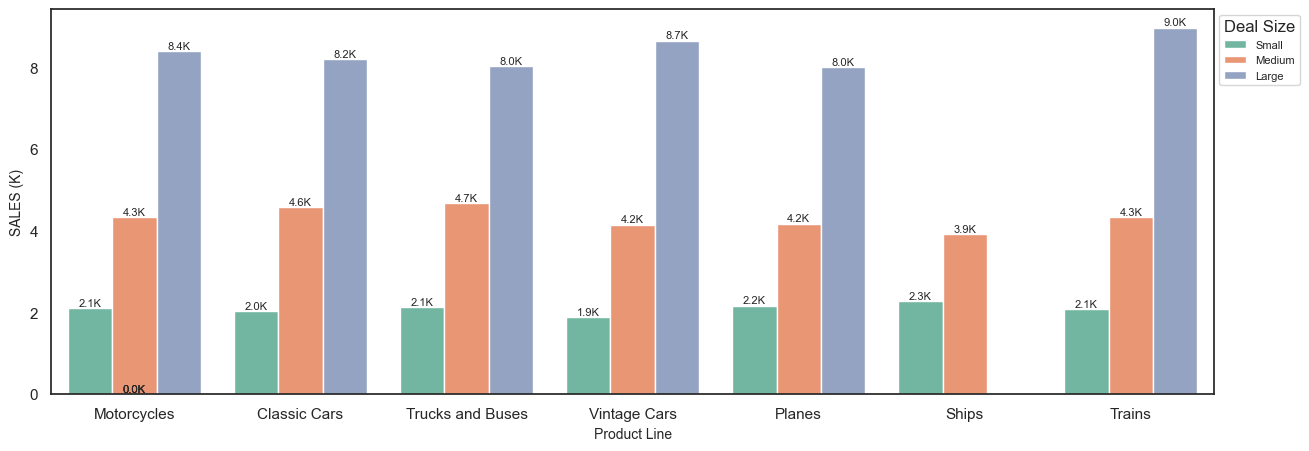

In [54]:
# Comparison between Sales, Product Line along with Dealsize as Hue
sns.set(style="white", rc={"figure.figsize": (15, 5)})
cars_df["SALES (K)"] = cars_df["SALES"] / 1000
sns.barplot(data=cars_df, x="PRODUCTLINE", y="SALES (K)", hue="DEALSIZE", palette="Set2", ci=None)
plt.ylabel("SALES (K)", fontsize=10)
plt.xlabel("Product Line", fontsize=10)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}K', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)
plt.legend(title="Deal Size", fontsize=8, loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

In [55]:
def multivariate_analysis_visualizations(df, x_data, x_label, y_data, y_label, hue, legend_title):
    '''
    This user-defined function creates barplot visualization that provides insight into the product line compared to quantity ordered, price of
    each vehicle, and MSRP based on deal size.
    '''
    sns.set(style="white", rc={"figure.figsize": (15, 5)})
    sns.barplot(data=df, x=x_data, y=y_data, hue=hue, palette="viridis", ci=None)
    plt.ylabel(y_label, fontsize=10)
    plt.xlabel(x_label, fontsize=10)
    for p in plt.gca().patches:
        plt.gca().annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',fontsize=8)
    plt.legend(title=legend_title, fontsize=10, loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

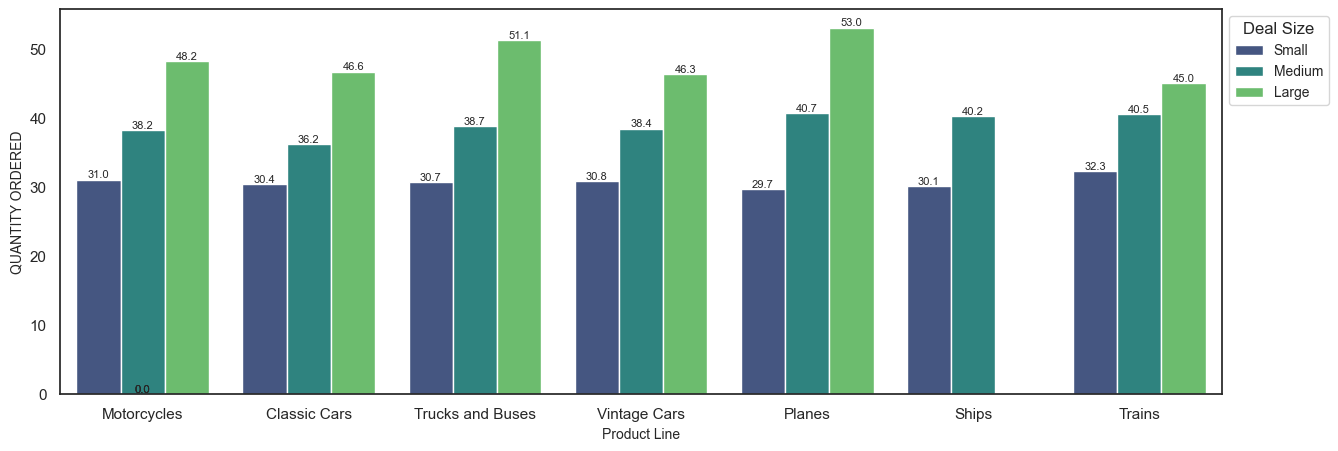

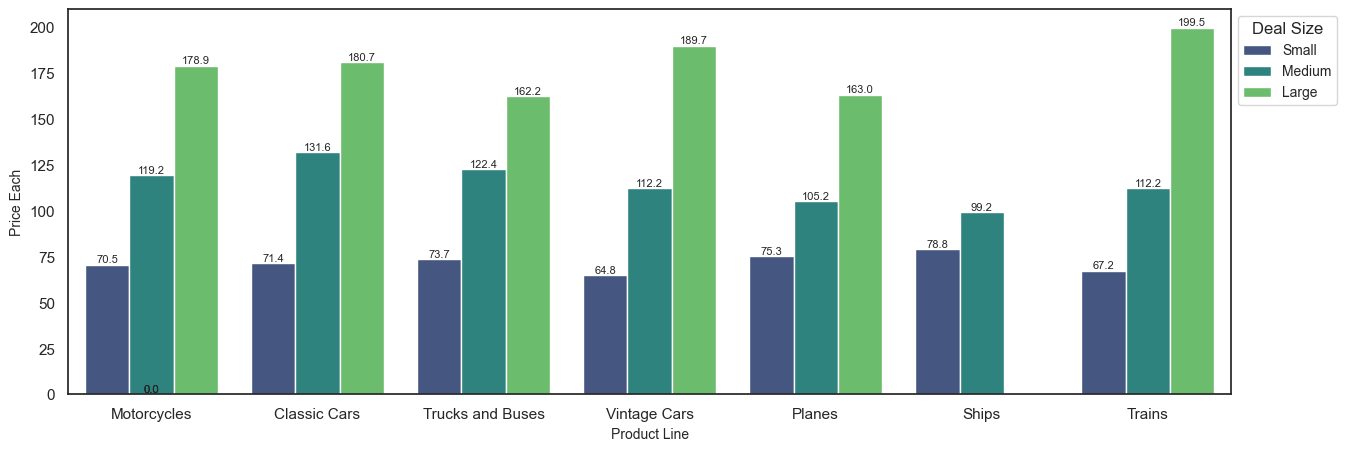

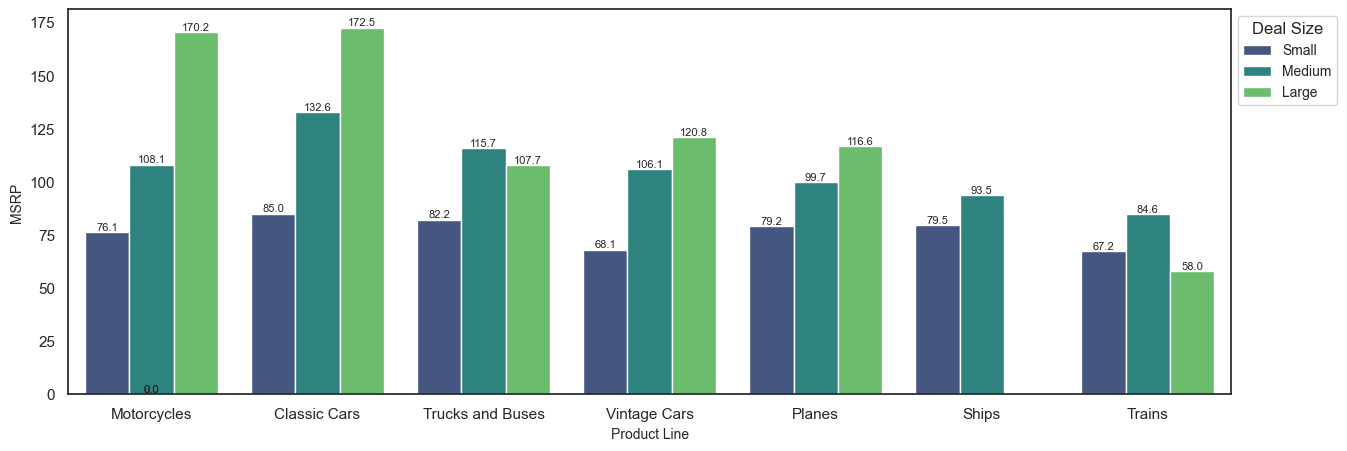

In [56]:
#Comparision between Quantity Ordered, Product Line along with Dealsize as Hue
multivariate_analysis_visualizations(cars_df, "PRODUCTLINE", "Product Line", "QUANTITYORDERED", "QUANTITY ORDERED", "DEALSIZE","Deal Size")
print('\n')
#Comparision between Product Line, Product Line along with Dealsize as Hue
multivariate_analysis_visualizations(cars_df, "PRODUCTLINE", "Product Line", "PRICEEACH", "Price Each", "DEALSIZE","Deal Size")
print('\n')
#Comparision between MSRP, Product Line along with Dealsize as Hue
multivariate_analysis_visualizations(cars_df, "PRODUCTLINE", "Product Line", "MSRP", "MSRP", "DEALSIZE","Deal Size")
print('\n')

In [57]:
def multivariate_analysis_visualization_sales(df, x_data, x_label, y_data, y_label):
    '''
    This user-defined function creates barplot visualization that provides insight into the sales(in thousands) of dollars in U.S. currency
    based on both product line and deal size.
    '''
    sns.set(style="white", rc={"figure.figsize": (15, 5)})
    sns.barplot(data=df, x=x_data, y=y_data, hue="Year", palette = 'viridis',  ci=None)
    plt.xlabel(x_label, fontsize=10)
    plt.ylabel(y_label, fontsize=10)
    plt.title("Yearly Sales", fontsize=10)
    for p in plt.gca().patches:
        plt.gca().annotate(f'{p.get_height():.1f}K', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',fontsize=8)
    plt.legend(title="Year",fontsize=10,  loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

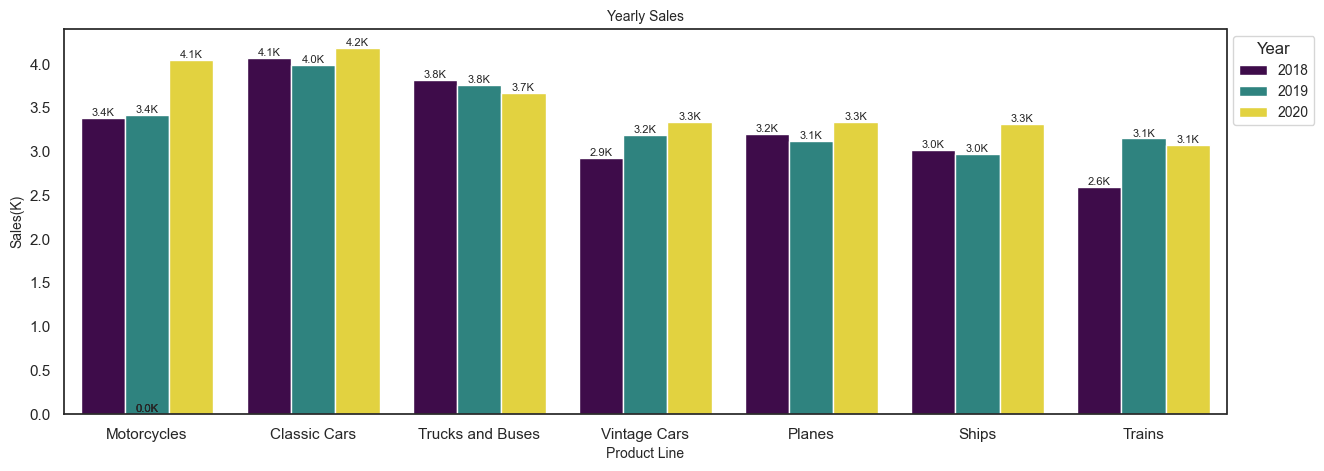

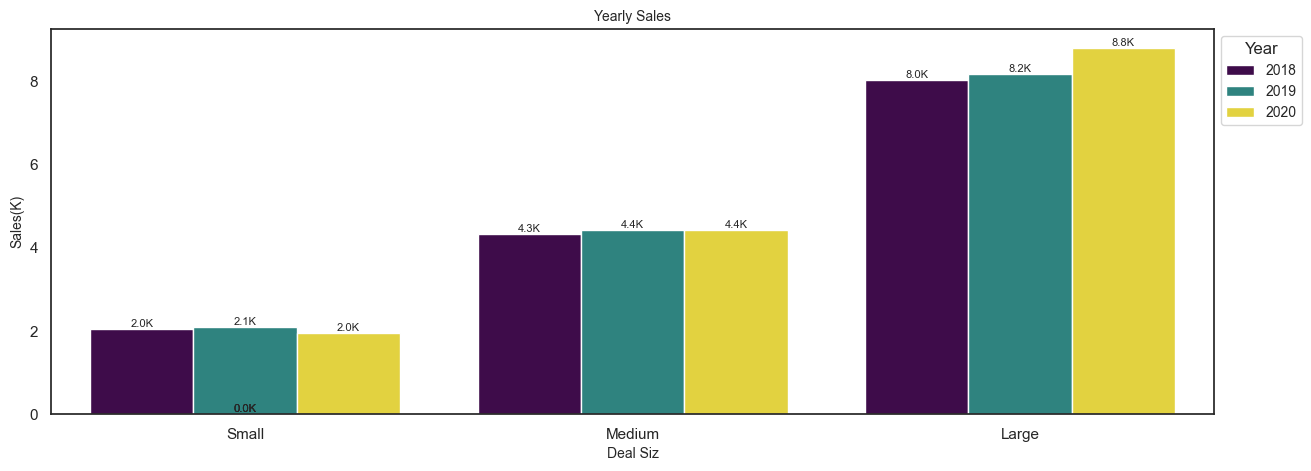

In [58]:
# Comparison between Product line, Sales (K), along with Year as the hue
multivariate_analysis_visualization_sales(cars_df,"PRODUCTLINE", "Product Line", "SALES (K)", "Sales(K)")
print('\n')
# Comparison between Deal Size, Sales (K), along with Year as the hue
multivariate_analysis_visualization_sales(cars_df,"DEALSIZE", "Deal Siz", "SALES (K)", "Sales(K)")
print('\n')

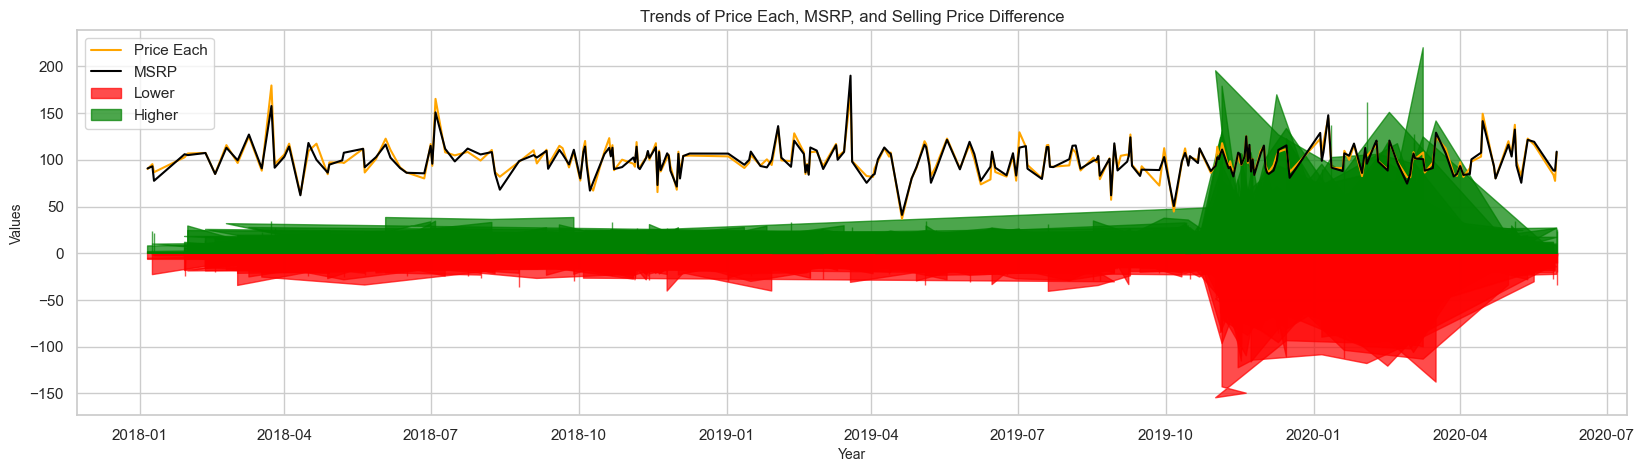

In [59]:
#Trend of Price, MSRP and Selling Price Difference
# Selling Price Difference is calculated as the difference between manufactured suggested price and selling price
cars_df["SELLING_PRICE_DIFF"] =  cars_df["PRICEEACH"]-cars_df["MSRP"]
sns.set(style="whitegrid", rc={"figure.figsize": (20, 5)})
sns.lineplot(data=cars_df, x="ORDERDATE", y="PRICEEACH", ci=None, label="Price Each", color='orange')
sns.lineplot(data=cars_df, x="ORDERDATE", y="MSRP", ci=None, label="MSRP", color='black')
plt.fill_between(cars_df["ORDERDATE"], cars_df["SELLING_PRICE_DIFF"], where=(cars_df["SELLING_PRICE_DIFF"] < 0), color="red", alpha=0.7, label="Lower")
plt.fill_between(cars_df["ORDERDATE"], cars_df["SELLING_PRICE_DIFF"], where=(cars_df["SELLING_PRICE_DIFF"] >= 0), color="green", alpha=0.7, label="Higher")
plt.title("Trends of Price Each, MSRP, and Selling Price Difference")
plt.xlabel("Year", fontsize=10)
plt.ylabel("Values", fontsize=10)
plt.legend(loc='best')
plt.show()

### **Key Insights from Analysis** 

**Sales Overview:**

* 298 orders placed by 89 customers from 19 countries in the last 2.5 years.
* United States leads in sales, followed by Spain and France. Notable sales from Australia and Singapore in the Eastern Hemisphere.
* Among cities, Madrid tops sales, with San Diego and New York City following.
* In the Eastern Hemisphere, sales from Australia and Singapore declined, while customers from Japan were added in 2019.
* Significant sales increase observed in US and France in 2019.

**Product and Revenue:**

* The company manufactures 109 automobile parts under 7 product lines with prices ranging from 26 to 252.
* Classic Car parts generate the maximum revenue through sales (approx. 40%).
* Car, Truck, Bus, and Motorcycle parts account for 80% of the company's revenue.

**Sales Trends:**

* Upward sales trend with monthly seasonality. Peak sales in October and November annually.
* Higher sales and customer activity in the early months of 2020 compared to previous years.

**Concern**

* No new customers added since September 2019.

**Transaction Characteristics:**

* Most deals are of medium and small size, with transactions typically containing 20 to 50 items.

**Key Customers:**

* Euro Shopping Channel and Mini Gifts Distribution Ltd. are best customers (highest spending, most frequent, and recent).

**Customer Retention:**

* A good customer retention rate of approximately 90% was observed in 2019.